# RNN(LSTM)

Here we will forecast the future of inflation using RNN(LSTM).

### 1. Preparing the datasets & Importing neccessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

In [ ]:
!git clone https://github.com/farelarden/Dicoding-Capstone-ML.git

fatal: destination path 'Dicoding-Capstone-ML' already exists and is not an empty directory.


In [ ]:
df_Makanan = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 02 - Makanan.csv',index_col='BULAN')
df_Minuman = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 02 - Minuman.csv',index_col='BULAN')
df_Rumah = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 03 - Rumah.csv',index_col='BULAN')
df_Sandang = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 04 - Sandang.csv',index_col='BULAN')
df_Transportasi = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 07 - Transportasi.csv',index_col='BULAN')

## 2. Data Preprocessing

In [ ]:
df_Makanan.index.freq='MS'

In [ ]:
df_Makanan = df_Makanan[['KOTA MEULABOH']]

In [ ]:
df_Makanan.head()

,KOTA MEULABOH
BULAN,
2014-01-01,1.10
2014-02-01,0.88
2014-03-01,1.42
2014-04-01,0.17
2014-05-01,-0.01


In [ ]:
df_Makanan.shape

(94, 1)

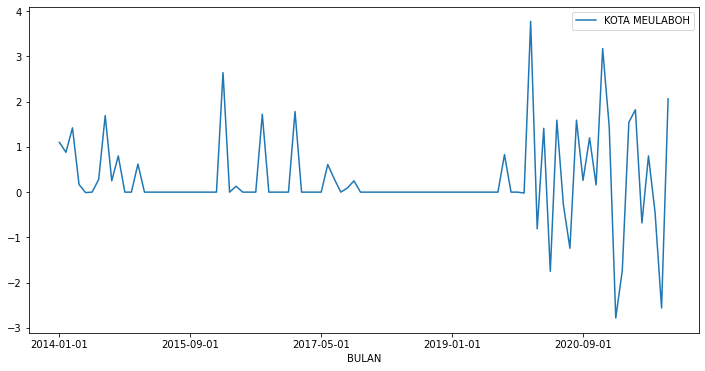

In [ ]:
df_Makanan.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

## 3. Train and Split Data

In [ ]:
train = df_Makanan.iloc[:math.ceil(df_Makanan.shape[0]*0.8)]
test = df_Makanan.iloc[math.ceil(df_Makanan.shape[0]*0.8):]

In [ ]:
train

,KOTA MEULABOH
BULAN,
2014-01-01,1.10
2014-02-01,0.88
2014-03-01,1.42
2014-04-01,0.17
2014-05-01,-0.01
...,...
2019-12-01,-0.02
2020-01-01,3.77
2020-02-01,-0.81


In [ ]:
test

,KOTA MEULABOH
BULAN,
2020-05-01,1.59
2020-06-01,-0.28
2020-07-01,-1.24
2020-08-01,1.59
2020-09-01,0.26
2020-10-01,1.20
2020-11-01,0.16
2020-12-01,3.17
2021-01-01,1.45


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
scaled_train[:10]

array([[0.51630435],
       [0.47644928],
       [0.57427536],
       [0.34782609],
       [0.31521739],
       [0.31702899],
       [0.36775362],
       [0.62318841],
       [0.36231884],
       [0.46195652]])

In [ ]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.51630435 0.47644928 0.57427536 0.34782609 0.31521739 0.31702899
 0.36775362 0.62318841 0.36231884 0.46195652 0.31702899 0.31702899]
Predict this y: 
 [[0.42934783]]


In [ ]:
X.shape

(1, 12, 1)

In [ ]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# # define model
# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

In [ ]:
import keras

In [ ]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
        units=128,
        input_shape=(n_input, n_features)
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')
# history = modet. fit(
#     X_train, y_train,
#     epochs=30,
#     batch_ size=32,
#     validation_split=0.1,
#     shuffle=False
# )


In [ ]:
# fit model
model.fit(generator,epochs=100)

Epoch 1/100
64/64 [==============================] - 5s 11ms/step - loss: 0.0272
Epoch 2/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0194
Epoch 3/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0206
Epoch 4/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0206
Epoch 5/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0192
Epoch 6/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0198
Epoch 7/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0187
Epoch 8/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0197
Epoch 9/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0191
Epoch 10/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0190
Epoch 11/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0180
Epoch 12/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0183
Epoch 13/100
64/64 [=====

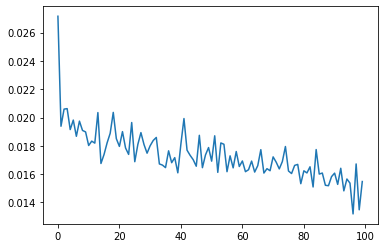

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

array([[0.6442505]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.60507246])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test['Prediction']=test_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test.head()

,KOTA MEULABOH,Prediction
BULAN,,
2020-05-01,1.59,[0.6442505]
2020-06-01,-0.28,[0.31551492]
2020-07-01,-1.24,[0.48055714]
2020-08-01,1.59,[0.34310532]
2020-09-01,0.26,[0.32810163]


In [ ]:
test.dtypes

KOTA MEULABOH    float64
Prediction        object
dtype: object

In [ ]:
test['Prediction'] = test['Prediction'].astype(float, errors = 'raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test.dtypes

KOTA MEULABOH    float64
Prediction       float64
dtype: object

In [ ]:
test.tail()

,KOTA MEULABOH,Prediction
BULAN,,
2021-06-01,-0.68,0.397746
2021-07-01,0.80,0.350624
2021-08-01,-0.44,0.368769
2021-09-01,-2.56,0.365986
2021-10-01,2.06,0.385196


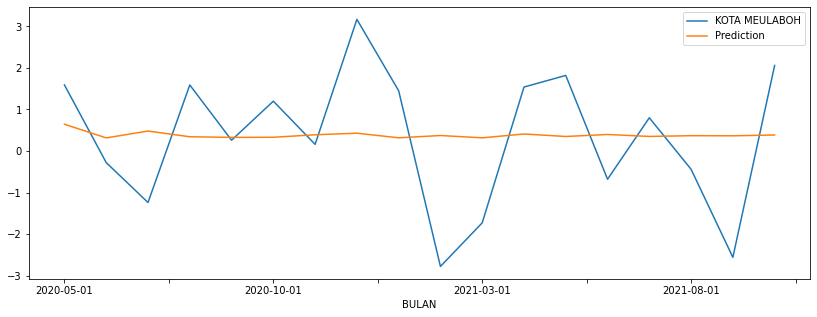

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=mean_squared_error(test['KOTA MEULABOH'],test['Prediction'])
print(rmse)

2.574000765916763


## 4. Forecasting

In [ ]:
month_vals = []
for i in range(100):
    month_vals.append(i)
forecast_data = pd.DataFrame(month_vals, columns = ['Prediction'])
# forecast_data['URUTAN'] = month_vals

In [ ]:
forecast_data['date'] = pd.date_range(start='10/1/2021', periods=len(forecast_data), freq='M')

In [ ]:
forecast_data

,Prediction,date
0,0,2021-10-31
1,1,2021-11-30
2,2,2021-12-31
3,3,2022-01-31
4,4,2022-02-28
...,...,...
95,95,2029-09-30
96,96,2029-10-31
97,97,2029-11-30
98,98,2029-12-31


In [ ]:
forecast_data.set_index('date')

,Prediction
date,
2021-10-31,0
2021-11-30,1
2021-12-31,2
2022-01-31,3
2022-02-28,4
...,...
2029-09-30,95
2029-10-31,96
2029-11-30,97


In [ ]:
forecast_predictions = []

first_eval_batch = scaled_test[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(forecast_data)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    forecast_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
forecast_data['Prediction']=forecast_predictions

In [ ]:
forecast_data

In [ ]:
forecast_data['Prediction'] = forecast_data['Prediction'].astype(float, errors = 'raise')

## 5. Masking the dates

In [ ]:
mask = (forecast_data['date'] > '2021-10-31') & (forecast_data['date'] <= '2021-12-31')

In [ ]:
mask2 = forecast_data.loc[mask]

In [ ]:
mask2

In [ ]:
inflation_average_rate = (mask2['Prediction'].sum())/mask2.shape[0]

In [ ]:
print(inflation_average_rate)